# **Modeling and Evaluation**


## Objectives

- Answer business requirement 2:
  - The client is interested in predicting if a cherry leaf is healthy or contains powdery mildew.

## Inputs

- inputs/datasets/cherry-leaves/train
- inputs/datasets/cherry-leaves/validation
- inputs/datasets/cherry-leaves/test
- image shape embeddings

## Outputs

- Images distribution plot in train, validation, and test set
- Image augmentation
- Class indices to change prediction inference in labels
- Machine learning model creation and training
- Save model
- Learning curve plot for model performance
- Model evaluation on pickle file
- Prediction on the random image file

## Additional Comments

- Version 1 will be created and try different ways to fit the model to chose which has more accuracy


---


### Import regular packages


In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread


### Set working directory


We need to change the working directory from its current folder to its parent folder

- We access the current directory with os.getcwd()


In [2]:
import os
current_dir = os.getcwd()
current_dir


'/workspace/milestone-project-mildew-detection-in-cherry-leaves/jupyter_notebooks'

We want to make the parent of the current directory the new current directory

- os.path.dirname() gets the parent directory
- os.chir() defines the new current directory


In [3]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")


You set a new current directory


Confirm the new current directory


In [4]:
work_dir = os.getcwd()
work_dir


'/workspace/milestone-project-mildew-detection-in-cherry-leaves'

### Set input directories


In [5]:
my_data_dir = 'inputs/datasets/cherry-leaves'
train_path = my_data_dir + '/train'
val_path = my_data_dir + '/validation'
test_path = my_data_dir + '/test'


### Set output directory


In [6]:
version = 'v1'
file_path = f'outputs/{version}'

if 'outputs' in os.listdir(work_dir) and version in os.listdir(work_dir + '/outputs'):
    print('Old version is already available, please create a new version.')
    pass
else:
    os.makedirs(name=file_path)


Old version is already available, please create a new version.


### Set labels


In [7]:
labels = os.listdir(train_path)

print(
    f"Project Labels: {labels}"
)


Project Labels: ['healthy', 'powdery_mildew']


### Set image shape


- Import the image shape from the output folder using the library joblib


In [8]:
import joblib
version = 'v1'
image_shape = joblib.load(filename=f"outputs/{version}/image_shape.pkl")
image_shape


(50, 50, 3)

---


## Number of images in train, test and validation data


- Get the number of images in the train, validation and test datasets, and plot them.


* train - healthy: 1472 images
* train - powdery_mildew: 1472 images
* validation - healthy: 210 images
* validation - powdery_mildew: 210 images
* test - healthy: 422 images
* test - powdery_mildew: 422 images




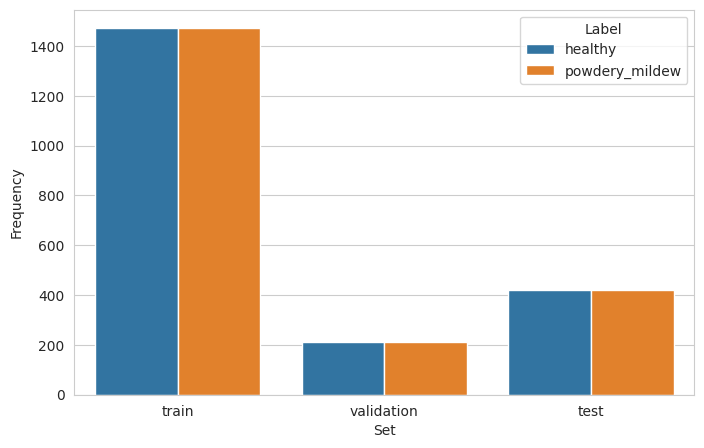

In [9]:
df_freq = pd.DataFrame([])
# Create a dataframe and append each folder to it, and for each of them, every
# label and its frequency.
for folder in ['train', 'validation', 'test']:
    for label in labels:
        df_freq = df_freq.append(
            pd.Series(data={'Set': folder,
                            'Label': label,
                            'Frequency': int(len(os.listdir(my_data_dir+'/' + folder + '/' + label)))}
                      ),
            ignore_index=True
        )

        print(
            f"* {folder} - {label}: {len(os.listdir(my_data_dir+'/'+ folder + '/' + label))} images")

print("\n")
# Create the figure to plot the dataframe
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
sns.barplot(data=df_freq, x='Set', y='Frequency', hue='Label')
plt.savefig(f'{file_path}/labels_distribution.png',
            bbox_inches='tight', dpi=150)
plt.show()


---


## Image data augmentation


- We need to generate different images in the train set to use them during ther training. We import the library **ImageDataGenerator** to do it. The images will be created in an artificial and temporarilly way, in RAM memory.


In [10]:
Import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator


- Initialize ImageDataGenerator


In [11]:
augmented_image_data = ImageDataGenerator(rotation_range=20,
                                          width_shift_range=0.10,
                                          height_shift_range=0.10,
                                          shear_range=0.1,
                                          zoom_range=0.1,
                                          horizontal_flip=True,
                                          vertical_flip=True,
                                          fill_mode='nearest',
                                          rescale=1./255
                                          )


- Augment training image dataset


In [12]:
# We are going to generate 20 images for each image in the dataset, and save them as train_set variable
batch_size = 20  # Set batch size
train_set = augmented_image_data.flow_from_directory(train_path,
                                                     target_size=image_shape[:2],
                                                     color_mode='rgb',
                                                     batch_size=batch_size,
                                                     class_mode='binary',
                                                     shuffle=True
                                                     )

train_set.class_indices


Found 2944 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

- Augment validation image dataset


In [13]:
# we are augmenting the validation images only by standardizing image pixels between 0 to 255
validation_set = ImageDataGenerator(rescale=1./255).flow_from_directory(val_path,
                                                                        target_size=image_shape[:2],
                                                                        color_mode='rgb',
                                                                        batch_size=batch_size,
                                                                        class_mode='binary',
                                                                        shuffle=False
                                                                        )

validation_set.class_indices


Found 420 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

- Augment test image dataset


In [14]:
# we are augmenting the test images only by standardizing image pixels between 0 to 255
test_set = ImageDataGenerator(rescale=1./255).flow_from_directory(test_path,
                                                                  target_size=image_shape[:2],
                                                                  color_mode='rgb',
                                                                  batch_size=batch_size,
                                                                  class_mode='binary',
                                                                  shuffle=False
                                                                  )

test_set.class_indices


Found 844 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

### Plot augmented training images


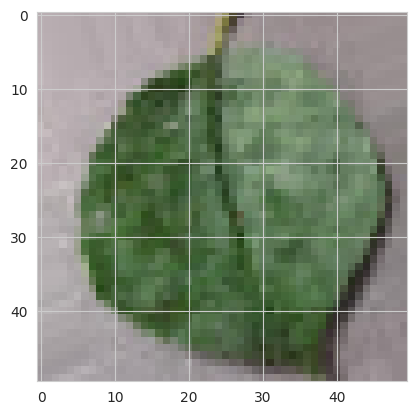

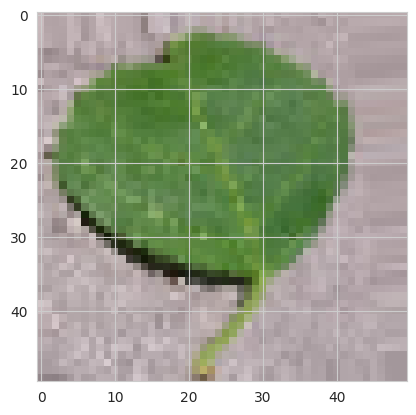

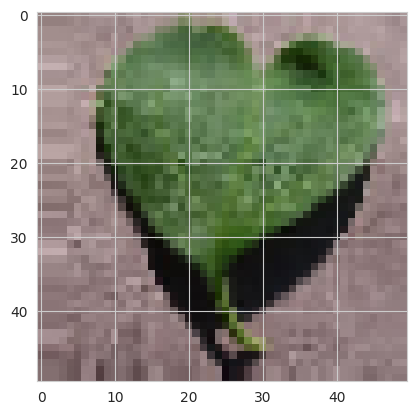

In [19]:
for _ in range(3):
    img, label = train_set.next()
    plt.imshow(img[0])
    plt.show()


### Plot augmented validation images


(20, 50, 50, 3)


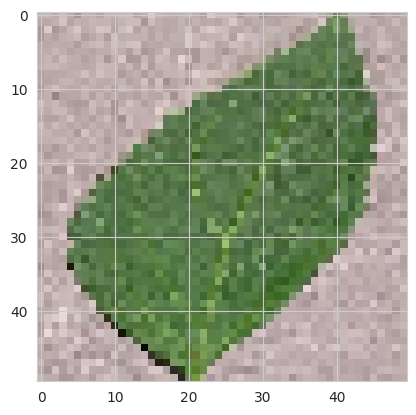

(20, 50, 50, 3)


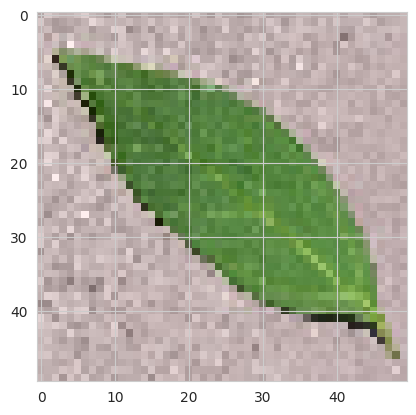

(20, 50, 50, 3)


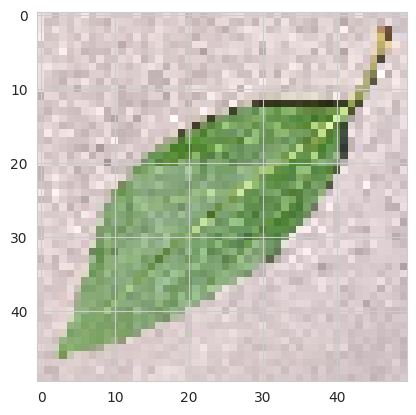

In [20]:
for _ in range(3):
    img, label = validation_set.next()
    plt.imshow(img[0])
    plt.show()


### Plot augmented test images


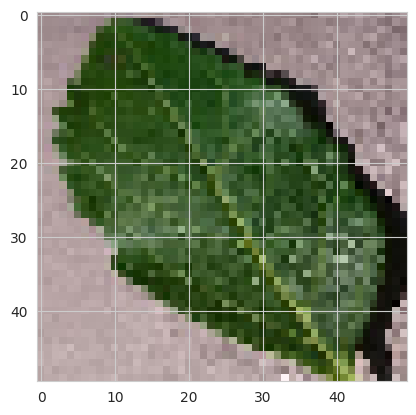

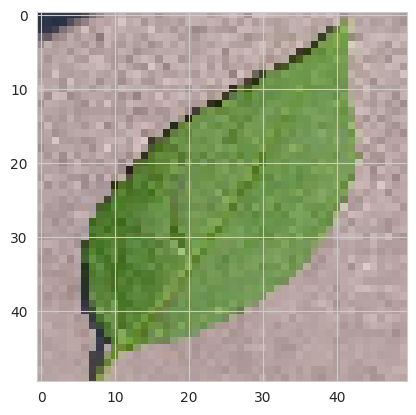

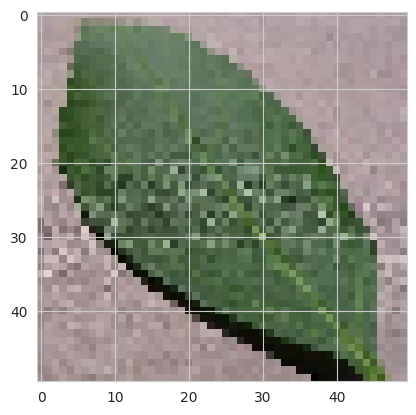

In [21]:
for _ in range(3):
    img, label = test_set.next()
    plt.imshow(img[0])
    plt.show()


- Save class_indices


In [15]:
joblib.dump(value=train_set.class_indices,
            filename=f"{file_path}/class_indices.pkl")


['outputs/v1/class_indices.pkl']

---


## Model creation


- Import model packages


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D


- Model


In [74]:
def create_tf_model():
    """ Create the model with different layers and the optimizer, and try different filters,
        differetn numbers of layers and optimizers """
    model = Sequential()

    model.add(Conv2D(filters=32, kernel_size=(3, 3),
              input_shape=image_shape, activation='relu',))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=64, kernel_size=(3, 3),
              input_shape=image_shape, activation='relu',))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=64, kernel_size=(3, 3),
              input_shape=image_shape, activation='relu',))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=64, kernel_size=(3, 3),
              input_shape=image_shape, activation='relu',))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))

    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
                    optimizer='adam',
                  metrics=['accuracy'])

    return model


- Model summary


In [35]:
create_tf_model().summary()


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 48, 48, 32)        896       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 9, 9, 64)          36928     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 2, 2, 64)         

- Early stopping


In [51]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=3)


## Fit model for model training


In [75]:
model = create_tf_model()
model.fit(train_set,
          epochs=25,
          steps_per_epoch=len(train_set.classes) // batch_size,
          validation_data=validation_set,
          callbacks=[early_stop],
          verbose=1
          )


Epoch 1/25
147/147 [==============================] - 12s 78ms/step - loss: 0.4295 - accuracy: 0.7695 - val_loss: 0.1463 - val_accuracy: 0.9476
Epoch 2/25
147/147 [==============================] - 6s 38ms/step - loss: 0.1752 - accuracy: 0.9364 - val_loss: 0.0843 - val_accuracy: 0.9786
Epoch 3/25
147/147 [==============================] - 5s 36ms/step - loss: 0.1054 - accuracy: 0.9607 - val_loss: 0.0551 - val_accuracy: 0.9833
Epoch 4/25
147/147 [==============================] - 5s 35ms/step - loss: 0.0733 - accuracy: 0.9767 - val_loss: 0.0244 - val_accuracy: 0.9929
Epoch 5/25
147/147 [==============================] - 5s 36ms/step - loss: 0.0439 - accuracy: 0.9853 - val_loss: 0.0459 - val_accuracy: 0.9857
Epoch 6/25
147/147 [==============================] - 5s 37ms/step - loss: 0.0374 - accuracy: 0.9880 - val_loss: 0.0121 - val_accuracy: 0.9929
Epoch 7/25
147/147 [==============================] - 5s 36ms/step - loss: 0.0370 - accuracy: 0.9887 - val_loss: 0.0076 - val_accuracy: 0.997

### Save model


In [33]:
model.save("outputs/v1/trainings/train-9/powdery_mildew_detector.h5")


---


## Model performance


### Model learning curve


- Function to show the learning curve of the model, to check if we have overfitting or underfitting.


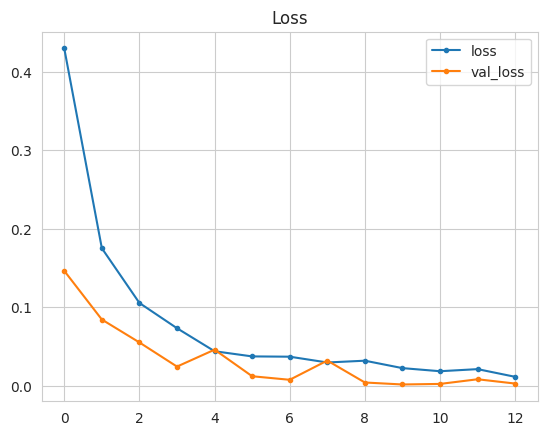

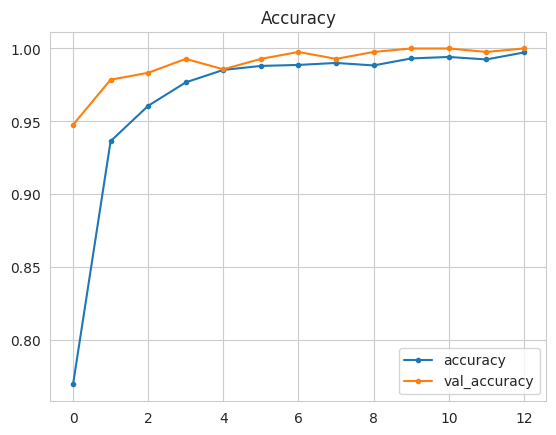

In [76]:
losses = pd.DataFrame(model.history.history)

sns.set_style("whitegrid")
losses[['loss', 'val_loss']].plot(style='.-')
plt.title("Loss")
plt.savefig(f'{file_path}/model_training_losses.png',
            bbox_inches='tight', dpi=150)
plt.show()

print("\n")
losses[['accuracy', 'val_accuracy']].plot(style='.-')
plt.title("Accuracy")
plt.savefig(f'{file_path}/model_training_acc.png',
            bbox_inches='tight', dpi=150)
plt.show()


## Model evaluation


- Load saved model


In [77]:
from keras.models import load_model
# train number 3 was finally the option than we choose.
model = load_model('outputs/v1/trainings/train-3/powdery_mildew_detector.h5')


- Evaluate model on test set


In [78]:
evaluation = model.evaluate(test_set)


43/43 [==============================] - 1s 14ms/step - loss: 0.0189 - accuracy: 0.9953


## Save evaluation pickle


In [42]:
joblib.dump(value=evaluation,
            filename=f"outputs/v1/trainings/train-8/evaluation.pkl")


['outputs/v1/trainings/train-8/evaluation.pkl']

## Prediction on new data


- Load a random image as PIL


Image shape: (50, 50), Image mode: RGB


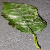

In [122]:
from tensorflow.keras.preprocessing import image

pointer = 66
label = labels[1]  # select a powderly mildew infected image

pil_image = image.load_img(test_path + '/' + label + '/' + os.listdir(test_path+'/' + label)[pointer],
                           target_size=image_shape, color_mode='rgb')
print(f'Image shape: {pil_image.size}, Image mode: {pil_image.mode}')
pil_image


- Convert the image to an array to make the prediction


In [123]:
my_image = image.img_to_array(pil_image)
my_image = np.expand_dims(my_image, axis=0)/255
print(my_image.shape)


(1, 50, 50, 3)


- Predict class probablilities.


In [134]:
pred_proba = model.predict(my_image)[0, 0]

target_map = {v: k for k, v in train_set.class_indices.items()}
pred_class = target_map[pred_proba > 0.5]


if pred_class == target_map[0]:
    pred_proba = 1 - pred_proba
print(pred_proba)
print(pred_class)


0.99999183
powdery_mildew


---


## Conclusions and next steps


- After fit the model with different configurations, we finally choose the train number 3 to create the final model
- It has six layers, drop percent of 0.5 in last layer to avoid overffiting, binary_crossentropy and adam as loss and optimizer hiperparameters respectively. 
- All the different training configurations meet the project requirement(at least 97% accuracy on test set).
- Our next steps are finish the dashboard and deploy the app.

 